<a href="https://colab.research.google.com/github/Ricardo1533/kauva/blob/main/Dataset_Concreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Ricardo Kauva

# Análise de Regressão: Predição da Resistência do Concreto

## Introdução

Este projeto tem como objetivo desenvolver um modelo de regressão linear para prever a resistência à compressão do concreto com base em seus componentes e idade. O conjunto de dados utilizado é proveniente do UCI Machine Learning Repository e contém informações sobre diferentes misturas de concreto e suas respectivas resistências.

### Sobre o Dataset
O conjunto de dados inclui 1030 amostras com 8 variáveis explicativas e 1 variável alvo:

**Variável Alvo:**
- Resistência à compressão do concreto (MPa)

**Variáveis Explicativas:**
- Cimento (kg/m³)
- Escória de alto forno (kg/m³)
- Cinzas volantes (kg/m³)
- Água (kg/m³)
- Superplastificante (kg/m³)
- Agregado graúdo (kg/m³)
- Agregado fino (kg/m³)
- Idade (dias)

### Objetivo
O objetivo principal é desenvolver um modelo capaz de prever a resistência do concreto com base em sua composição e idade, fornecendo uma ferramenta útil para engenheiros e profissionais da construção civil na otimização de misturas de concreto.

### Metodologia
A análise inclui:
1. Análise exploratória dos dados
2. Matriz de correlação entre variáveis
3. Padronização dos dados
4. Desenvolvimento do modelo de regressão linear
5. Avaliação do modelo através de métricas como R² e RMSE

Esta análise pode auxiliar na compreensão dos fatores que mais influenciam a resistência do concreto e na otimização de suas formulações.

In [39]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
# Instruções para carregar o arquivo:
# Clique no ícone de pasta na barra lateral esquerda.
# Clique no ícone de upload (seta para cima) e selecione o arquivo Concrete_Data.xls do seu computador.
# O arquivo será carregado para o diretório /content/.

# Carregar o arquivo do diretório local do Colab
try:
    # Changed to read_csv for the new file path and type
    data = pd.read_csv('/home/dados_concreto - Sheet1.csv')

    # Print the actual columns of the loaded DataFrame
    print("Columns in the loaded CSV file:")
    print(data.columns)

    # Renomear colunas para better comprehension
    # Updated column names to match the CSV file including the extra column
    columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
               'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength', 'Strength Category']
    data.columns = columns

    # Rename columns to a more convenient format for analysis if needed later
    data.rename(columns={
        'Cement': 'cement',
        'Blast Furnace Slag': 'blast_furnace_slag',
        'Fly Ash': 'fly_ash',
        'Water': 'water',
        'Superplasticizer': 'superplasticizer',
        'Coarse Aggregate': 'coarse_aggregate',
        'Fine Aggregate': 'fine_aggregate',
        'Age': 'age',
        'Concrete compressive strength': 'strength'
    }, inplace=True)

    # Mostrar as primeiras linhas do dataset
    print("Primeiras linhas do dataset:")
    print(data.head())

    # Informações sobre o dataset
    print("\nInformações do dataset:")
    print(data.info())

    # Identificação das variáveis
    print("\nVariável alvo (Y):")
    print("- strength (Resistência à compressão do concreto)")

    print("\nVariáveis explicativas (X):")
    # Assuming 'strength' is the target and 'Strength Category' is not needed for the model
    explanatory_vars = [col for col in data.columns if col not in ['strength', 'Strength Category']]
    for col in explanatory_vars:
        print(f"- {col}")

    # Estatísticas descritivas
    print("\nEstatísticas descritivas:")
    print(data.describe())


except FileNotFoundError:
    print("Erro: O arquivo '/home/dados_concreto - Sheet1.csv' não foi encontrado.")
    print("Por favor, verifique o caminho do arquivo e tente novamente.")
    # You can add code here to exit or handle the error in another way if necessary.
    # For example, raise FileNotFoundError("Arquivo não encontrado.")

Columns in the loaded CSV file:
Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength', 'Strength Category'],
      dtype='object')
Primeiras linhas do dataset:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate    age  strength Strength Category  
0            1040.0           676.0   28.0     79.99              Alto  
1            1055.0           676.0   28.0     61.89              Alto  
2             932.0           594.0  270.0     40.27             Baixa  
3             932.0          

In [41]:
# Code moved to the previous cell

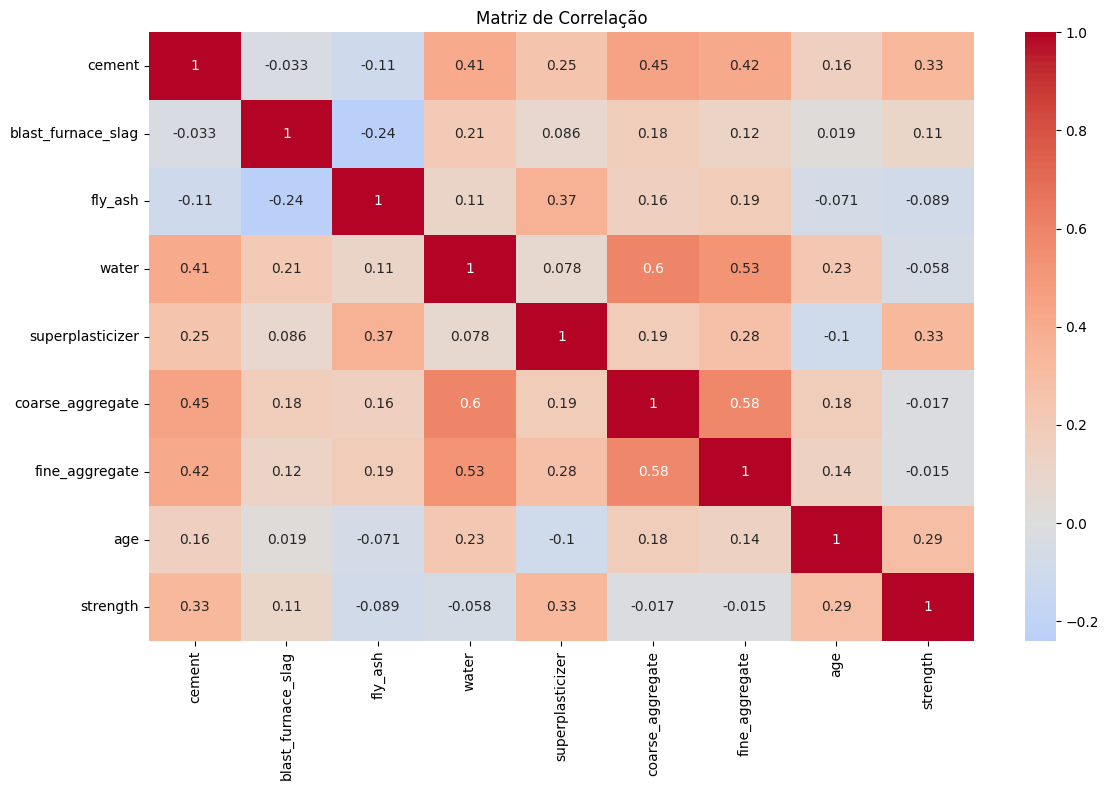


Correlações com a variável alvo (strength):
strength              1.000000
superplasticizer      0.329791
cement                0.327826
age                   0.290215
blast_furnace_slag    0.106848
fly_ash               0.089434
water                 0.057646
coarse_aggregate      0.017209
fine_aggregate        0.015073
Name: strength, dtype: float64


In [42]:
# Criar a matriz de correlação
plt.figure(figsize=(12, 8))
# Exclude the non-numeric 'Strength Category' column before calculating correlation
correlation_matrix = data.drop('Strength Category', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

# Mostrar correlações com a variável alvo
# Exclude 'Strength Category' from correlations as well
correlations = correlation_matrix['strength'].abs().sort_values(ascending=False)
print("\nCorrelações com a variável alvo (strength):")
print(correlations)

In [43]:
# Separar features e target
explanatory_vars = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                    'coarse_aggregate', 'fine_aggregate', 'age']
X = data[explanatory_vars]
y = data['strength']

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=['strength'])
X = data_cleaned[explanatory_vars]
y = data_cleaned['strength']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados do modelo:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Resultados do modelo:
R² Score: 0.3731
RMSE: 13.0869


In [44]:
# Formar a equação da reta
print("Equação da regressão linear:")
print("Y = ", end="")
# Use explanatory_vars for the correct variable names
for i, coef in enumerate(model.coef_):
    print(f"{coef:.4f}*{explanatory_vars[i]} + ", end="")
print(f"{model.intercept_:.4f}")

# Criar um DataFrame com os coeficientes para melhor visualização
# Use explanatory_vars for the correct variable names
coef_df = pd.DataFrame({
    'Variável': explanatory_vars,
    'Coeficiente': model.coef_
})
print("\nCoeficientes do modelo:")
print(coef_df)

Equação da regressão linear:
Y = 0.0277*cement + 0.0204*blast_furnace_slag + -0.0055*fly_ash + -0.0312*water + 0.5870*superplasticizer + -0.0033*coarse_aggregate + -0.0054*fine_aggregate + 0.0550*age + 32.7081

Coeficientes do modelo:
             Variável  Coeficiente
0              cement     0.027720
1  blast_furnace_slag     0.020435
2             fly_ash    -0.005460
3               water    -0.031228
4    superplasticizer     0.587005
5    coarse_aggregate    -0.003282
6      fine_aggregate    -0.005353
7                 age     0.055036


In [45]:
# Verificar dados faltantes
print("Verificação de dados faltantes:")
print(data.isnull().sum())

Verificação de dados faltantes:
cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              9
Strength Category     0
dtype: int64


In [46]:
from sklearn.preprocessing import StandardScaler

# Separar features e target
# Use data_cleaned which has no missing values in the target
explanatory_vars = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                    'coarse_aggregate', 'fine_aggregate', 'age']
X = data_cleaned[explanatory_vars]
y = data_cleaned['strength']

# Padronizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Use explanatory_vars for column names when creating the DataFrame from scaled data
X_scaled = pd.DataFrame(X_scaled, columns=explanatory_vars)

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinar modelo com dados padronizados
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nResultados do modelo com dados padronizados:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Criar DataFrame com os coeficientes padronizados
# Use explanatory_vars for variable names
coef_df = pd.DataFrame({
    'Variável': explanatory_vars,
    'Coeficiente Padronizado': model.coef_
})
print("\nCoeficientes do modelo padronizado:")
print(coef_df.sort_values('Coeficiente Padronizado', ascending=False))


Resultados do modelo com dados padronizados:
R² Score: 0.3731
RMSE: 13.0869

Coeficientes do modelo padronizado:
             Variável  Coeficiente Padronizado
0              cement                 6.581816
4    superplasticizer                 6.000218
7                 age                 5.692892
1  blast_furnace_slag                 2.957216
2             fly_ash                -0.575498
5    coarse_aggregate                -1.984425
6      fine_aggregate                -2.582751
3               water                -3.463126


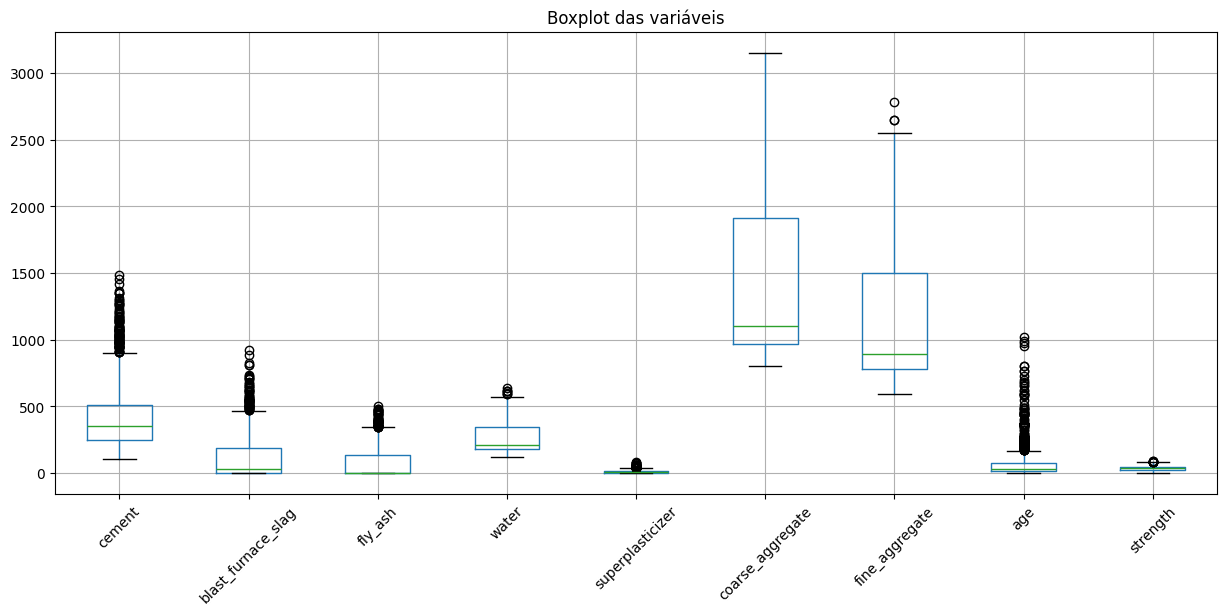


Número de outliers por variável:
cement: 104
blast_furnace_slag: 63
fly_ash: 55
water: 7
superplasticizer: 42
coarse_aggregate: 0
fine_aggregate: 3
age: 196
strength: 11


In [47]:
# Criar boxplots para visualizar outliers
plt.figure(figsize=(15, 6))
# Exclude the non-numeric 'Strength Category' column for boxplot
data.drop('Strength Category', axis=1).boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot das variáveis')
plt.show()

# Análise mais detalhada dos outliers
def detect_outliers(df):
    outliers = {}
    # Exclude the non-numeric 'Strength Category' column for outlier detection
    numeric_df = df.drop('Strength Category', axis=1)
    for column in numeric_df.columns:
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = len(numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)])
    return outliers

outliers = detect_outliers(data)
print("\nNúmero de outliers por variável:")
for var, count in outliers.items():
    print(f"{var}: {count}")